In [ ]:
!pip install opencv-python scikit-learn tensorflow matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import cv2

Dataset structure:

Total number of faces: 3023
Image shape: (62, 47)
Target labels: ['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Mahmoud Abbas' 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Nestor Kirchner' 'Paul Bremer' 'Pete Sampras' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rudolph Giu

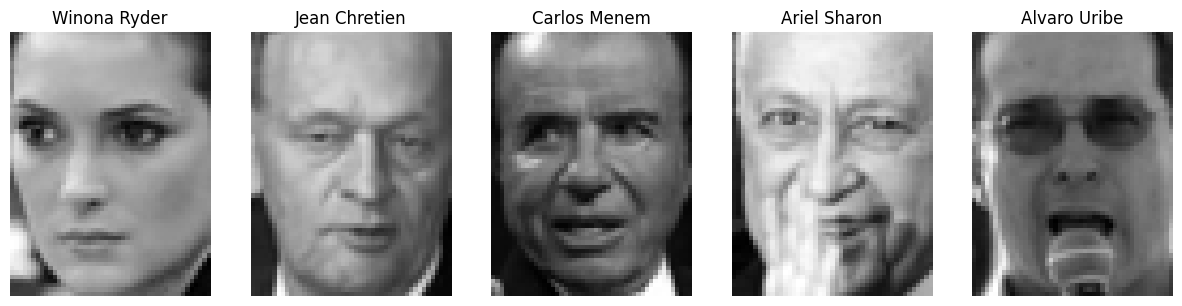

In [ ]:
lfw = fetch_lfw_people(min_faces_per_person=20, resize=0.5)
X_raw = lfw.images
y_raw = lfw.target
target_names = lfw.target_names

# Step 4: Display Dataset Structure & Sample Images
print(f"Dataset structure:\n")
print(f"Total number of faces: {len(X_raw)}")
print(f"Image shape: {X_raw[0].shape}")
print(f"Target labels: {target_names}")
print(f"Target class for the first image: {target_names[y_raw[0]]}")

# Show first 5 images and their labels
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(X_raw[i], cmap='gray')
    axes[i].set_title(target_names[y_raw[i]])
    axes[i].axis('off')
plt.show()


In [ ]:
bush_index = list(target_names).index("George W Bush")
y_binary = np.array([0 if label == bush_index else 1 for label in y_raw])

In [ ]:
X = X_raw / 255.0  # normalize
X = np.expand_dims(X, axis=-1)  # shape (n, h, w, 1)
y = to_categorical(y_binary, num_classes=2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(62, 47, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.8320 - loss: 0.5183 - val_accuracy: 0.8397 - val_loss: 0.4737
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.8310 - loss: 0.4762 - val_accuracy: 0.8397 - val_loss: 0.4413
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - accuracy: 0.8333 - loss: 0.4588 - val_accuracy: 0.8397 - val_loss: 0.4702
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8197 - loss: 0.4866 - val_accuracy: 0.8397 - val_loss: 0.4440
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.8072 - loss: 0.5114 - val_accuracy: 0.8397 - val_loss: 0.4402
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.8306 - loss: 0.4695 - val_accuracy: 0.8397 - val_loss: 0.4428
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.8273 - loss: 0.4748 - val_accuracy: 0.8397 - val_loss: 0.4466
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.8183 - loss: 0.4812 - val_accuracy: 0.8397 -

In [ ]:
oss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc * 100:.2f}%")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8414 - loss: 0.4436

Test Accuracy: 83.97%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


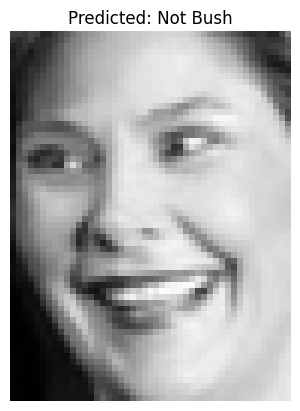

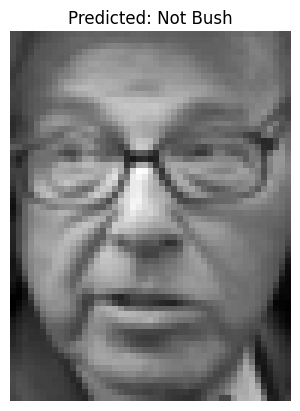

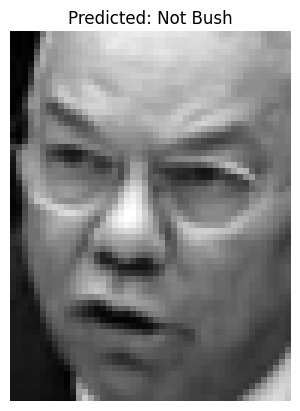

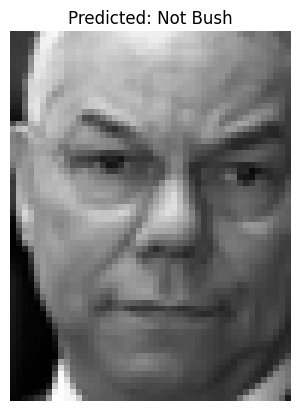

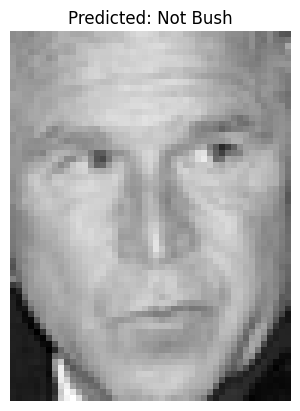

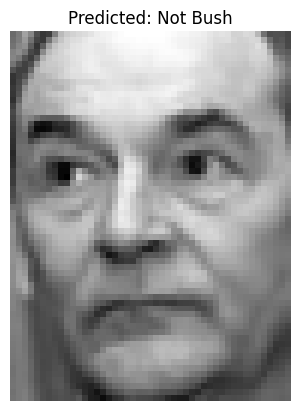

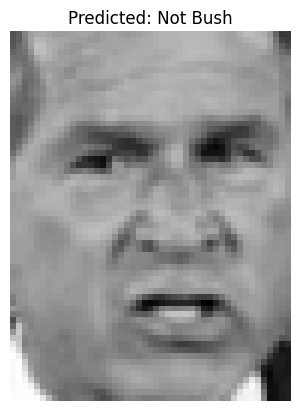

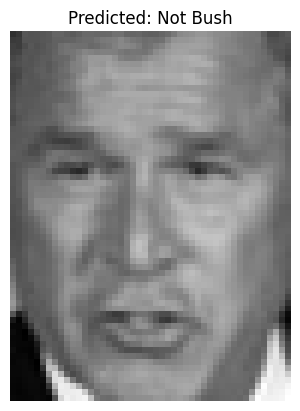

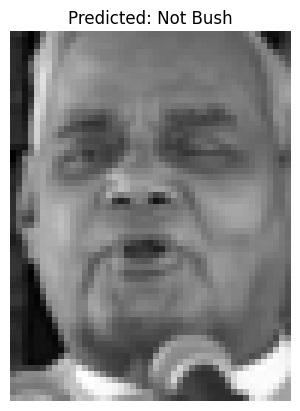

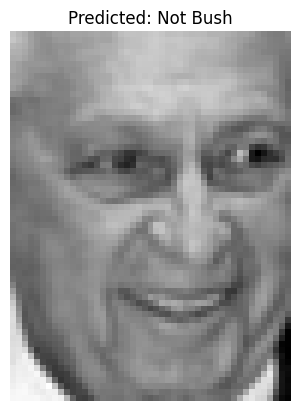

In [ ]:
preds = model.predict(X_test[:10])
for i in range(10):
    plt.imshow(X_test[i].reshape(62, 47), cmap='gray')
    label = "Bush" if np.argmax(preds[i]) == 0 else "Not Bush"
    plt.title(f"Predicted: {label}")
    plt.axis('off')
    plt.show()
